# Prosper Loan Data Exploration

### Yagmur Dalman

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including Borrower APR, Prosper Score, Loan Amount, Loan Status, Stated Monthly Income, and many others. I choose 14 variables for my analysis.


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics

loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# check duplicates 
loan.duplicated().sum()

0

In [5]:
# the columns will be used in the analysis
columns = ['Term','LoanStatus', 'BorrowerAPR','ProsperScore','ListingCategory (numeric)',
           'ProsperRating (numeric)','BorrowerState', 'Occupation',
           'EmploymentStatus','IsBorrowerHomeowner', 'LoanOriginalAmount',
           'DelinquenciesLast7Years', 'DebtToIncomeRatio','StatedMonthlyIncome']
# take the needed columns
df = loan[columns]
# drop the rows with missing value 
df.dropna(inplace = True)


In [6]:
# rename some of the columns to match the style
df.rename(columns = {'ProsperRating (numeric)':'ProsperRatingNumeric',
                     'ListingCategory (numeric)': 'ListingCategoryNumeric'}, inplace = True)


In [7]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 14 columns):
Term                       76224 non-null int64
LoanStatus                 76224 non-null object
BorrowerAPR                76224 non-null float64
ProsperScore               76224 non-null float64
ListingCategoryNumeric     76224 non-null int64
ProsperRatingNumeric       76224 non-null float64
BorrowerState              76224 non-null object
Occupation                 76224 non-null object
EmploymentStatus           76224 non-null object
IsBorrowerHomeowner        76224 non-null bool
LoanOriginalAmount         76224 non-null int64
DelinquenciesLast7Years    76224 non-null float64
DebtToIncomeRatio          76224 non-null float64
StatedMonthlyIncome        76224 non-null float64
dtypes: bool(1), float64(6), int64(3), object(4)
memory usage: 8.2+ MB


In [8]:
df.head()

,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategoryNumeric,ProsperRatingNumeric,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,LoanOriginalAmount,DelinquenciesLast7Years,DebtToIncomeRatio,StatedMonthlyIncome
1,36,Current,0.12016,7.0,2,6.0,CO,Professional,Employed,False,10000,0.0,0.18,6125.000000
3,36,Current,0.12528,9.0,16,6.0,GA,Skilled Labor,Employed,True,10000,14.0,0.15,2875.000000
4,36,Current,0.24614,4.0,2,3.0,MN,Executive,Employed,True,15000,0.0,0.26,9583.333333
5,60,Current,0.15425,10.0,1,5.0,NM,Professional,Employed,True,15000,0.0,0.36,8333.333333
6,36,Current,0.31032,2.0,1,2.0,KS,Sales - Retail,Employed,False,3000,0.0,0.27,2083.333333


In [9]:
# check for erroneous data
print(df.ProsperScore.unique())
print(df.ListingCategoryNumeric.unique())
print(df.ProsperRatingNumeric.unique())

[ 7.  9.  4. 10.  2. 11.  8.  5.  3.  6.  1.]
[ 2 16  1  7 13  6 15 20 19 18  8 11  3 14  9 17  0 10  5 12]
[6. 3. 5. 2. 4. 7. 1.]


There is no prosper score such 11 according to the data dictionary but in the Prosper website it is stated that  Prosper score ranges from 1 to 11, with 11 being the best, or lowest risk, score. So I will keep them.
https://www.prosper.com/plp/general-prosper_score/

### What is the structure of your dataset?

There are 76216 loans in the dataset with 14 attributes. They are: Term, LoanStatus, BorrowerAPR, ProsperScore, ListingCategory (numeric), ProsperRating (numeric), BorrowerState, Occupation, EmploymentStatus, IsBorrowerHomeowner, LoanOriginalAmount, DelinquenciesLast7Years, DebtToIncomeRatio, StatedMonthlyIncome.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in understanding what features are best for predicting the Borrower APR in the dataset. Also, I will be exploring the interaction between Prosper Score, Stated Monthly Income, Loan Original Amount and the other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect Prosper Score will have the strongest effect on Borrower APR: the higher Prosper Score, the lower Borrower APR. I also think that Loan Original Amount and Stated Monthly Income have effects on Borrower APR.

## Univariate Exploration

I'll start by looking at the distribution of each variable.

### Univariate Analysis

In [10]:
# set color
base_color = sb.color_palette()[0]

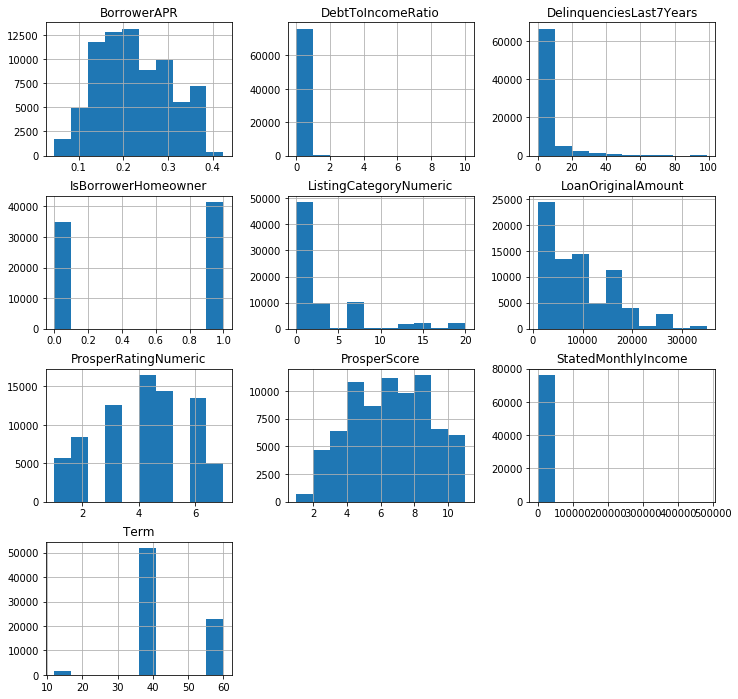

In [11]:
df.hist(figsize=(12,12));

#### Term

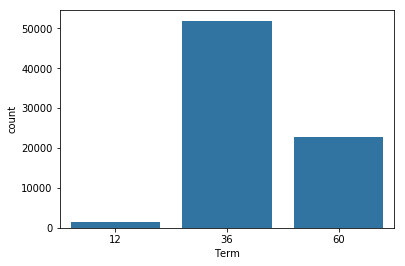

In [12]:
sb.countplot(data = df, x = 'Term', color = base_color)

The most common length of the loan is 36 months. 60 months is almost half of it and 12 months is the least common.

#### Loan Status

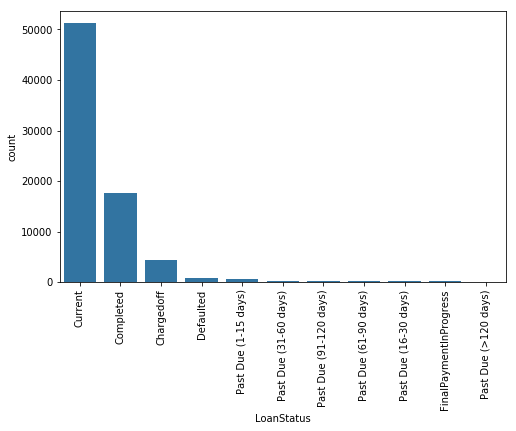

In [13]:
plt.figure(figsize=[8, 5]);
# order by count
status_order = df['LoanStatus'].value_counts().index
# plotting
sb.countplot(data = df, x = 'LoanStatus', color = base_color, order = status_order);
plt.xticks(rotation=90);


Most of the loans are current loans and completed, chargedoff loans follow it. Defaulted and past due loans are a small part of the distribution.

#### Borrower APR

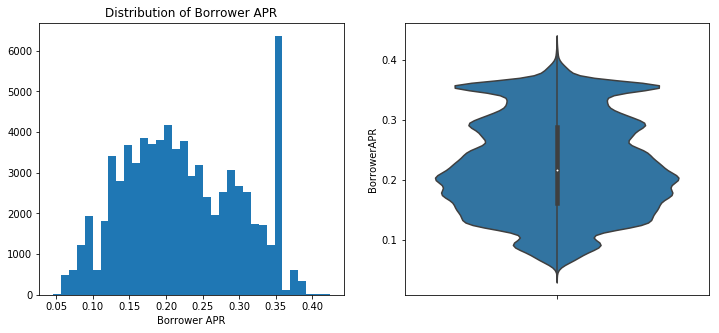

In [14]:
plt.figure(figsize = [12, 5])

plt.subplot(1,2,1)
plt.hist(data=df, x='BorrowerAPR', bins=35);
plt.title('Distribution of Borrower APR');
plt.xlabel('Borrower APR')

plt.subplot(1,2,2)
sb.violinplot(data = df, y = 'BorrowerAPR', color = base_color);

In [15]:
print(df.BorrowerAPR.describe())
print(df.BorrowerAPR.value_counts().head(3))
print(df.BorrowerAPR.mode())


count    76224.000000
mean         0.223904
std          0.079374
min          0.045830
25%          0.161570
50%          0.215660
75%          0.287800
max          0.423950
Name: BorrowerAPR, dtype: float64
0.35797    2990
0.35643    1328
0.30532     782
Name: BorrowerAPR, dtype: int64
0    0.35797
dtype: float64


Borrower APR is the cost of credit as a yearly rate, and the sum of the interest rate and the other fees.

Borrower APR changes between 4% and 42%. The mean borrower APR is around 22% and most of the borrowers pay around %20.
The distribution of the Borrower APR is bimodal, first peak is around 20% and the second one,mode, is around 35%. Interestingly, , there's a jump in frequency right before 35%, and a sharp drop just after 35%
Interestingly, there is a sharp drop before  35%

#### Prosper Rating Numeric

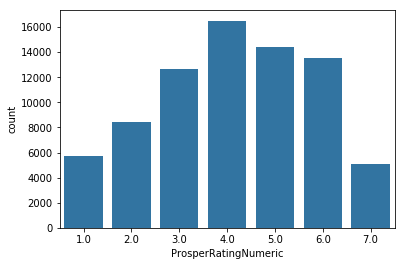

In [16]:
sb.countplot(data = df, x = 'ProsperRatingNumeric', color = base_color);


The Prosper Rating assigned as the following: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.

The most common rating is C and the number of the borrowers with the highest rating AA is the lowest. The distribution seems like a normal distribution.

#### Prosper Score

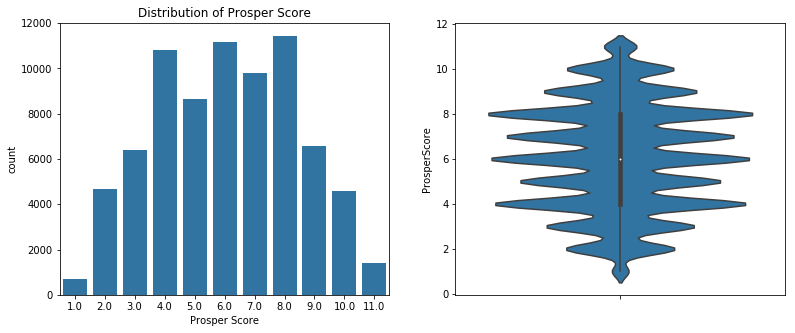

In [17]:
plt.figure(figsize = [13, 5]) 

plt.subplot(1,2,1)
sb.countplot(data = df, x = 'ProsperScore', color= base_color);
plt.xlabel('Prosper Score')
plt.title('Distribution of Prosper Score')

plt.subplot(1,2,2)
sb.violinplot(data = df, y = 'ProsperScore', color= base_color);


Prosper Score is the custom risk score was built using historical Prosper data to assess the risk of Prosper borrower listings. The output to Prosper users is a Prosper score which ranges from 1 to 11, with 11 being the best and 1 being the worst.

Its distribution is multimodal and has three peaks at 4, 6 and 8. The mean risk score is 6.

#### Listing Category

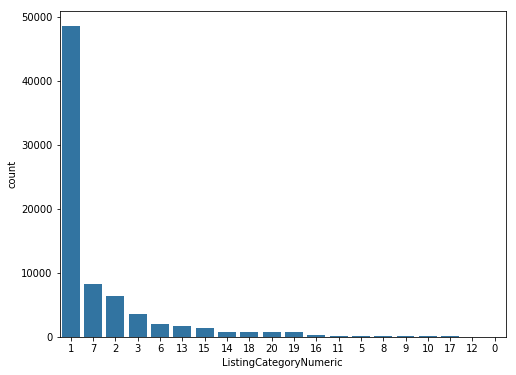

In [18]:
plt.figure(figsize=[8, 6]);
listing_order = df['ListingCategoryNumeric'].value_counts().index
sb.countplot(data = df, x = 'ListingCategoryNumeric', color = base_color, order = listing_order);


The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The higher proportion of the borrowers get loans for Debt Consolidation. Other reasons, Home Improvement and Business come after Debt Consolidation.

#### Borrower State

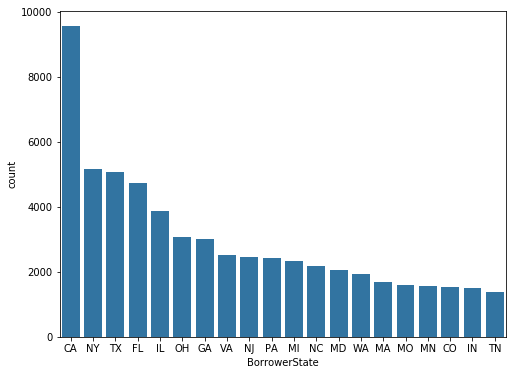

In [19]:
plt.figure(figsize=[8, 6]);

#order by count
state_order = df['BorrowerState'].value_counts()[:20].index

sb.countplot(data = df, x = 'BorrowerState', color = base_color, order = state_order);


Most of the borrowers are in California, New York, Texas, Florida and Illinois.

#### Occupation

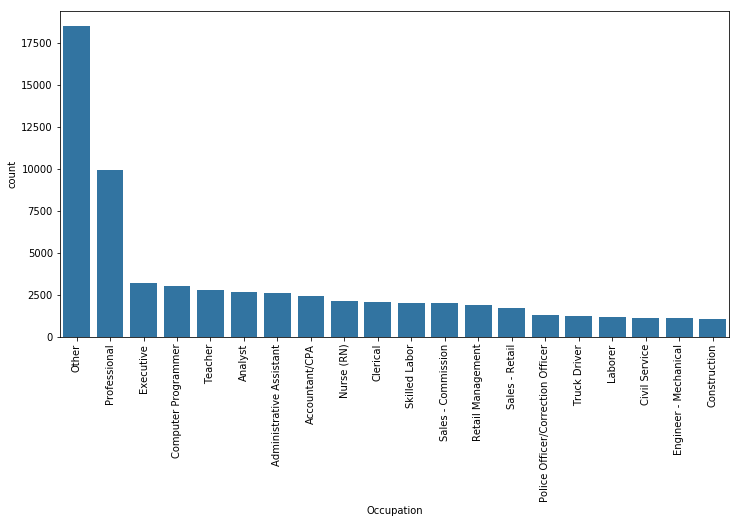

In [20]:
plt.figure(figsize=[12, 6]);
occup_order = df['Occupation'].value_counts()[:20].index
sb.countplot(data = df, x = 'Occupation', color = base_color, order = occup_order);
plt.xticks(rotation=90);


The number of borrowers who has an occupation in other category is the highest and number of borrowers who are professinal are the second highest.

#### Employment Status

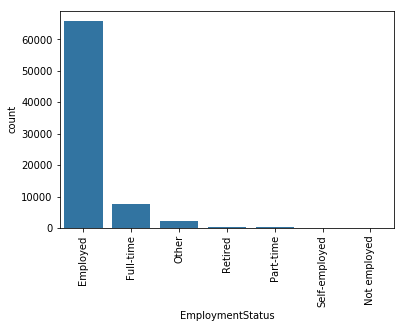

In [21]:
# order by count
occup_order = df['EmploymentStatus'].value_counts().index 

sb.countplot(data = df, x = 'EmploymentStatus', color = base_color, order = occup_order);
plt.xticks(rotation=90);

Majority of the borrowers are employed and full time.

#### Is Borrower Homeowner

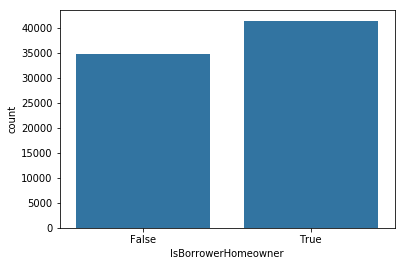

In [22]:
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color)

Most of the borrowers are homeowners.

#### Loan Original Amount

In [23]:
df.LoanOriginalAmount.describe()

count    76224.000000
mean      9294.811018
std       6413.578876
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

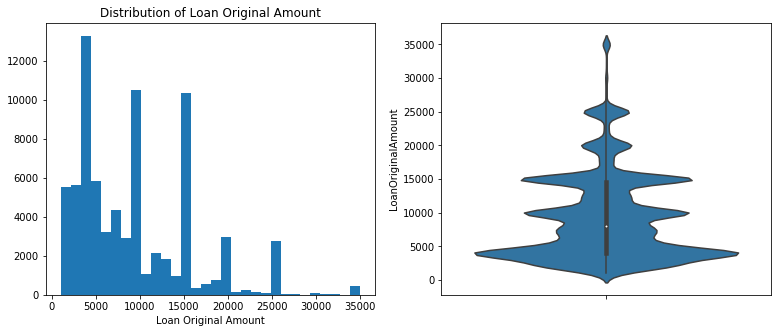

In [24]:
plt.figure(figsize = [13, 5]) 

plt.subplot(1,2,1)
plt.hist(data=df, x='LoanOriginalAmount', bins=30);
plt.xlabel('Loan Original Amount')
plt.title('Distribution of Loan Original Amount')

plt.subplot(1,2,2)
sb.violinplot(data = df, y = 'LoanOriginalAmount', color= base_color);

The distribution is multimodal. Most of the borrowers take loans smaller than 5000. There are three peaks around 4000, 10000 and 15000. There are steep jumps in frequencies just before these peak points.

#### Delinquencies in Last 7 Years

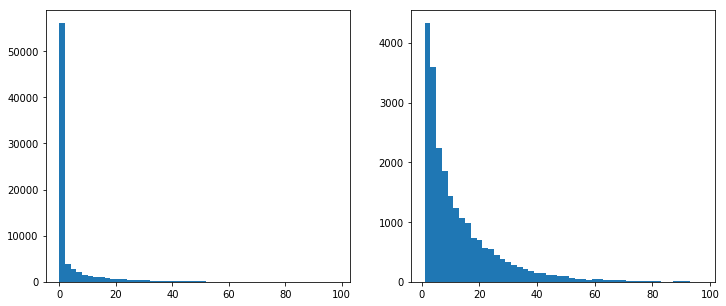

In [25]:
plt.figure(figsize = [12, 5]) 

plt.subplot(1, 2, 1);
bins = np.arange(0, df['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df, x = 'DelinquenciesLast7Years', bins = bins);

plt.subplot(1, 2, 2);
bins = np.arange(1, df['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df, x = 'DelinquenciesLast7Years', bins = bins);


Most of the borrowers have no delinquencies in the last 7 years. By excluding 0 values the distribution can be seen more clearly. It looks like an exponential distribution. Maximum number of delinquencies is 99 and the mean number is around 3. There are a small number of people who has delinquencies smaller than 20, and the number of other borrowers are even smaller.

#### Stated Monthly Income

In [26]:
df['StatedMonthlyIncome'].max()

483333.333333

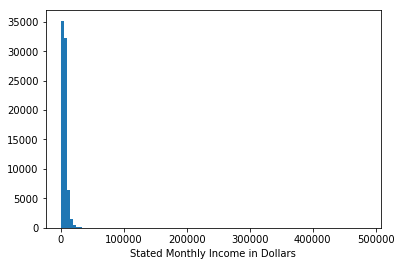

In [27]:
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=100);
plt.xlabel('Stated Monthly Income in Dollars');

The distribution of stated monthly income is highly right-skewed. The high numbers for income are outliers and also remember that the maximum loan original amount is \$35000. Thus I will limit income by 35000 and have a closer look.

In [28]:
df = df[df['StatedMonthlyIncome'] < 35000]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76103 entries, 1 to 113936
Data columns (total 14 columns):
Term                       76103 non-null int64
LoanStatus                 76103 non-null object
BorrowerAPR                76103 non-null float64
ProsperScore               76103 non-null float64
ListingCategoryNumeric     76103 non-null int64
ProsperRatingNumeric       76103 non-null float64
BorrowerState              76103 non-null object
Occupation                 76103 non-null object
EmploymentStatus           76103 non-null object
IsBorrowerHomeowner        76103 non-null bool
LoanOriginalAmount         76103 non-null int64
DelinquenciesLast7Years    76103 non-null float64
DebtToIncomeRatio          76103 non-null float64
StatedMonthlyIncome        76103 non-null float64
dtypes: bool(1), float64(6), int64(3), object(4)
memory usage: 8.2+ MB


We only lost 121 loan data.

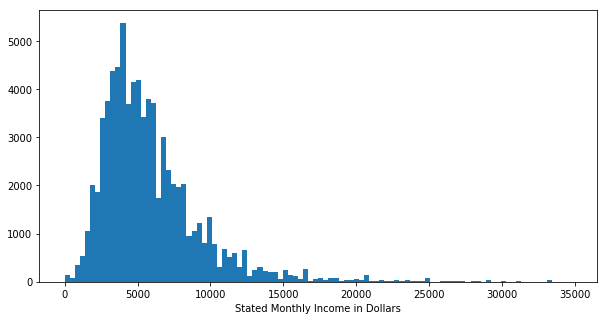

In [30]:
plt.figure(figsize = [10, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=100);
plt.xlabel('Stated Monthly Income in Dollars');


In [31]:
df.StatedMonthlyIncome.describe()

count    76103.000000
mean      5911.987444
std       3553.460294
min          0.250000
25%       3583.333333
50%       5010.250000
75%       7208.333333
max      34813.250000
Name: StatedMonthlyIncome, dtype: float64

The distribution is still right-skewed. The mean of monthly income is around 6k, the median income is around 5k and 75% of the borrowers have an income smaller than 7,2k and just a small proportion of borrowers have an income higher than 20k.

Since the people with very high income generally do not need loans it makes sense there are not many borrowers with high incomes.


We can also apply log transformation to StatedMonthlyIncome to have a normally distributed data.

In [32]:
np.log10(df.StatedMonthlyIncome.describe())

count    4.881402
mean     3.771734
std      3.550651
min     -0.602060
25%      3.554287
50%      3.699859
75%      3.857835
max      4.541745
Name: StatedMonthlyIncome, dtype: float64

(100, 100000)

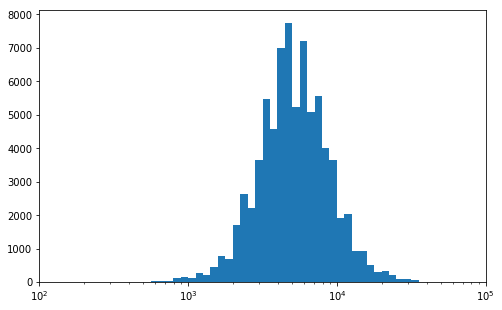

In [33]:
# apply log transformation to StatedMonthlyIncome
plt.figure(figsize = [8, 5])
bin_edges = 10 ** np.arange(-0.6, np.log10(df.StatedMonthlyIncome.max())+0.05, 0.05)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bin_edges);
plt.xscale('log')
plt.xlim(100,100000)



#### Debt To Income Ratio

In [34]:
df.DebtToIncomeRatio.describe()

count    76103.00000
mean         0.25832
std          0.32075
min          0.00000
25%          0.15000
50%          0.22000
75%          0.32000
max         10.01000
Name: DebtToIncomeRatio, dtype: float64

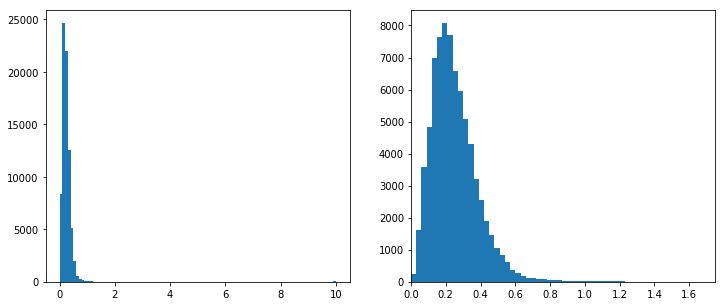

In [35]:
plt.figure(figsize = [12, 5]) 

plt.subplot(1, 2, 1);
plt.hist(data=df, x='DebtToIncomeRatio', bins =100);

plt.subplot(1, 2, 2);
bins = np.arange(0, df.DebtToIncomeRatio.max()+ 0.03, 0.03)
plt.hist(data = df, x = 'DebtToIncomeRatio',bins=bins);
plt.xlim(0,1.75);

Similar to the stated monthly income, the distribution is unimodal and skewed right. The ratio varies from 0 to 10 but there is a small number of borrowers with debt to income ratio greater than 1. The distribution is more clear in the second plot. The high ratios are outliers and and I will limit ratio by 1. 

In [36]:
df = df[df['DebtToIncomeRatio'] < 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75774 entries, 1 to 113936
Data columns (total 14 columns):
Term                       75774 non-null int64
LoanStatus                 75774 non-null object
BorrowerAPR                75774 non-null float64
ProsperScore               75774 non-null float64
ListingCategoryNumeric     75774 non-null int64
ProsperRatingNumeric       75774 non-null float64
BorrowerState              75774 non-null object
Occupation                 75774 non-null object
EmploymentStatus           75774 non-null object
IsBorrowerHomeowner        75774 non-null bool
LoanOriginalAmount         75774 non-null int64
DelinquenciesLast7Years    75774 non-null float64
DebtToIncomeRatio          75774 non-null float64
StatedMonthlyIncome        75774 non-null float64
dtypes: bool(1), float64(6), int64(3), object(4)
memory usage: 8.2+ MB


Data size decreased from 76224 to 75774 after excluding outliers in *StatedMonthlyIncome* and *DebtToIncomeRatio* columns.

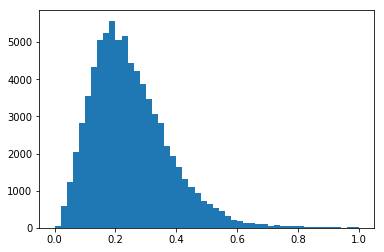

In [37]:
bins = np.arange(0, df.DebtToIncomeRatio.max()+ 0.02, 0.02)
plt.hist(data = df, x = 'DebtToIncomeRatio',bins=bins);


The distribution is still skewed-rigt. The mean ratio around 0.25 which means that borrowers get loans about 25% of their income.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Borrower APR data is bimodal, with one peak around 20% and the second one,mode, around 35%.
- Prosper Score data is multimodal and has three peaks at 4, 6 and 8, the mean risk score is 6.
- Loan Original Amount data is multimodal. Most of the borrowers take loans smaller than 5000. There are three peaks around 4000, 10000 and 15000.

 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were a number of outlier points in the StatedMonthlyIncome and DebtToIncomeRatio columns. It does not seem realistic the people who have really high montly incomes to borrow money. Since they are 'stated' monthly incomes, it is possible that the borrowers did not report their true income. Also, the high numbers for DebtToIncomeRatio means that some people have too much debt considering their income. Thus, I removed those outliers from the dataset and the data size decreased from 76224 to 75774.

I applied log transformation to the right-skewed Stated Monthly Income data and obtain normally distributed data.


## Bivariate Exploration

First, have a look at the pairwise correlations present between features in the data.

In [38]:
numeric_vars = ['Term', 'BorrowerAPR','ProsperScore','LoanOriginalAmount',
                'DelinquenciesLast7Years', 'DebtToIncomeRatio', 'StatedMonthlyIncome']


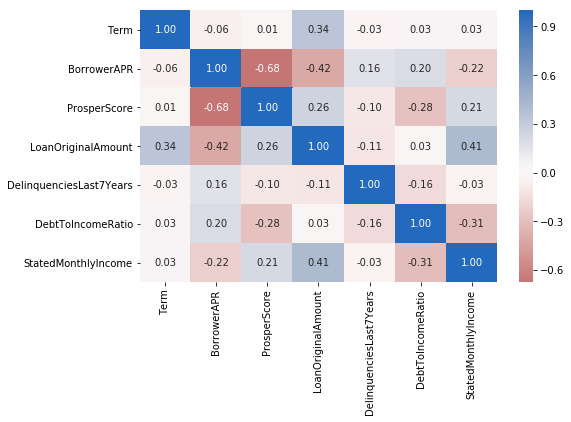

In [39]:
# correlation plot
plt.figure(figsize = [8, 5]);
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);


It looks like there is almost a strong negative relationship between Borrower APR and Prosper Score. There are a moderate negative correlation between Borrower APR and Loan Amount, some weak correlation between Borrower APR and Delinquencies in Last 7 Years, Borrower APR and Debt to Income Ratio, Borrower APR and Stated Monthly Income.

There are also some weak correlation between Prosper Score and Loan Amount, Prosper Score and Delinquencies in Last 7 Years, Prosper Score and Debt to Income Ratio, Prosper Score and Stated Monthly Income.

Additionally, Loan Amount and Stated Monthly Income are negatively correlated.


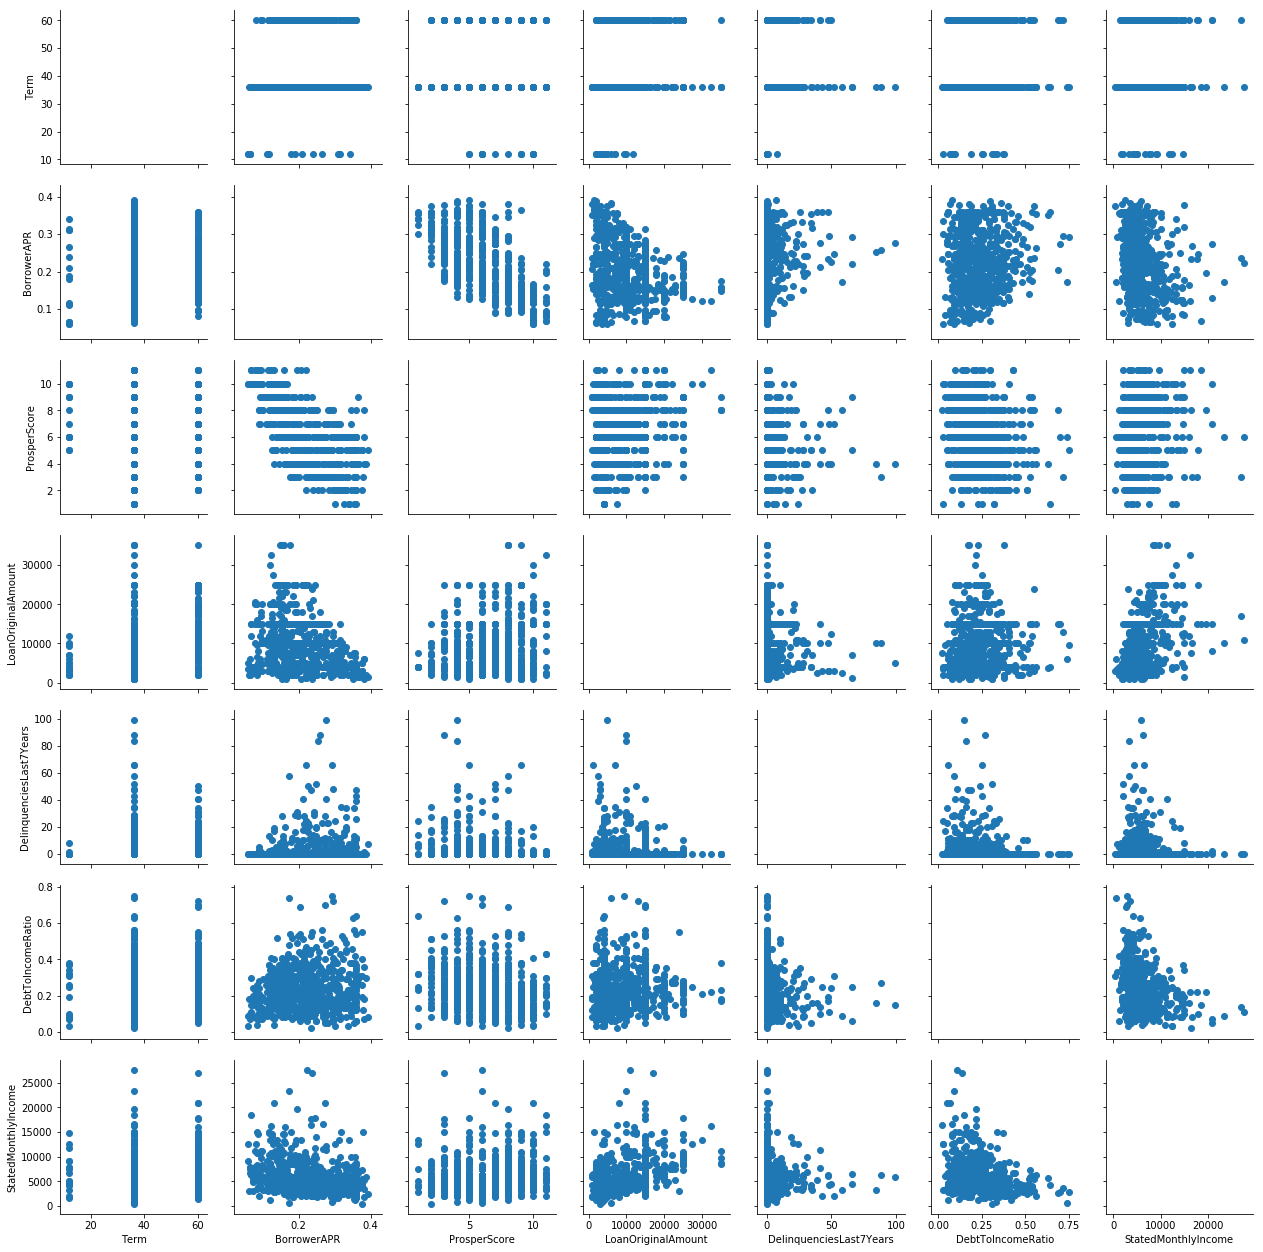

In [40]:
# plot matrix: sample 1000 loans so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars);
g.map_offdiag(plt.scatter);

It looks like there is almost a strong negative relationship between Borrower APR and Prosper Score. There are moderate negative correlation between Borrower APR and Loan Amount, some weak correlation between Borrower APR and Delinquencies in Last 7 Years, Borrower APR and Debt to Income Ratio, Borrower APR and Stated Monthly Income.

There are also some weak correlation between Prosper Score and Loan Amount, Prosper Score and Delinquencies in Last 7 Years, Prosper Score and Debt to Income Ratio, Prosper Score and Stated Monthly Income.

Additionally, Loan Amount and Stated Monthly Income are negatively correlated.

Let's move on to looking at how Borrower APR and Loan Amount correlate with some of the categorical variables.


<Figure size 1080x720 with 0 Axes>

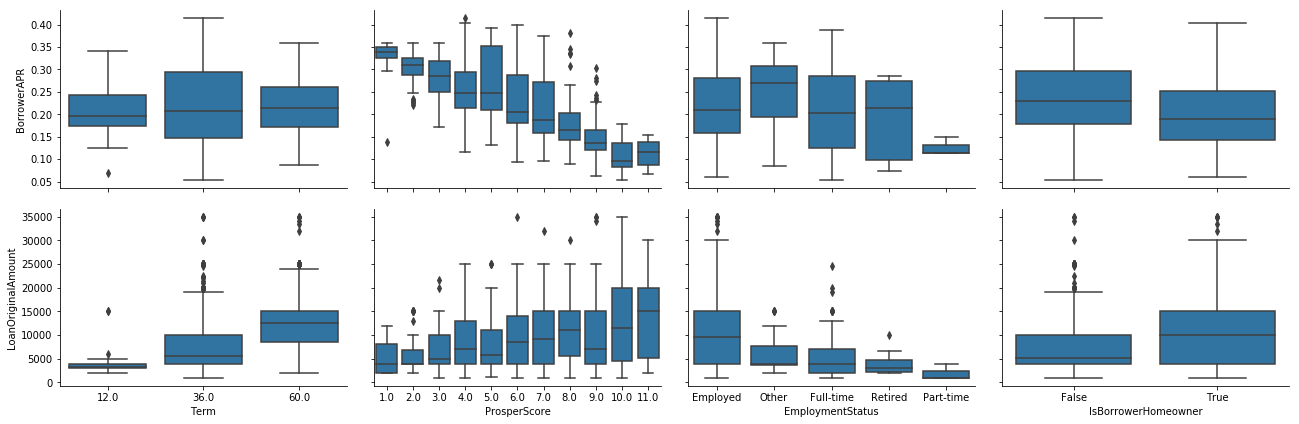

In [41]:
# plot matrix of numeric features against some of the categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

categoric_vars = ['Term','ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner' ]

samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [15, 10]);
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'],
                x_vars = categoric_vars, size = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

First, I will look at the relationship between Borrower APR and the other varibles one by one.

### Borrower APR

####  Borrower APR & Prosper Score 

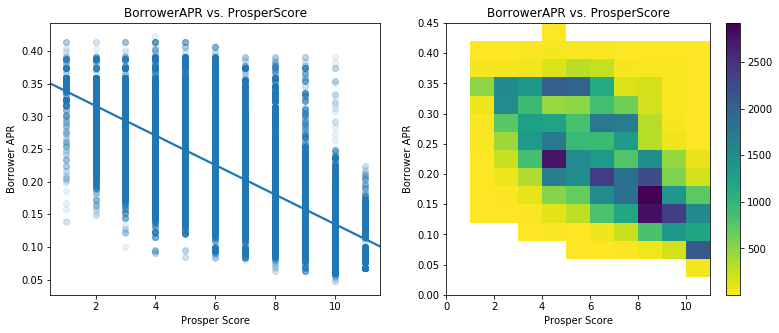

In [42]:
# scatter and heat plots for ProsperScore and BorrowerAPR. 
plt.figure(figsize = [13, 5]) 

plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', scatter_kws = {'alpha' : 1/10});
plt.title('BorrowerAPR vs. ProsperScore')
plt.ylabel('Borrower APR')
plt.xlabel('Prosper Score')

plt.subplot(1, 2, 2)
bins_x = np.arange(0, df['ProsperScore'].max()+1, 1)
bins_y = np.arange(0, df['BorrowerAPR'].max()+0.03, 0.03)
plt.hist2d(data = df, x = 'ProsperScore', y = 'BorrowerAPR', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.ylabel('Borrower APR')
plt.xlabel('Prosper Score');

It can be clearly seen that there is a negative correlation between Prosper Score and Borrower APR, which means that people with lower credit risk score pay more for the loan. The rate is even small as 0.05 for the borrower with risk score 10. This relationship is not surprising because the borrowers with high Prosper Score may be considered as trustworthy people and they are believed to pay their debts on time so get lower Borrower APR. Of course, a good Prosper Score is not enough for such a conclusion but we cannot deny its effect on Borrower APR.

####  Borrower APR & Loan Original Amount 

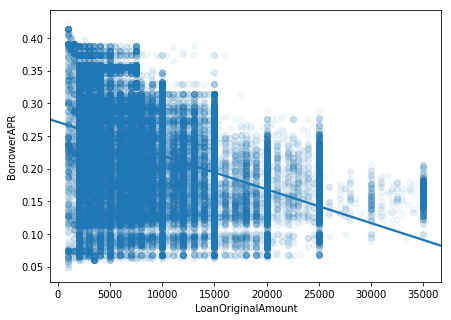

In [43]:
plt.figure(figsize = (7,5))
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws = {'alpha' : 1/20});

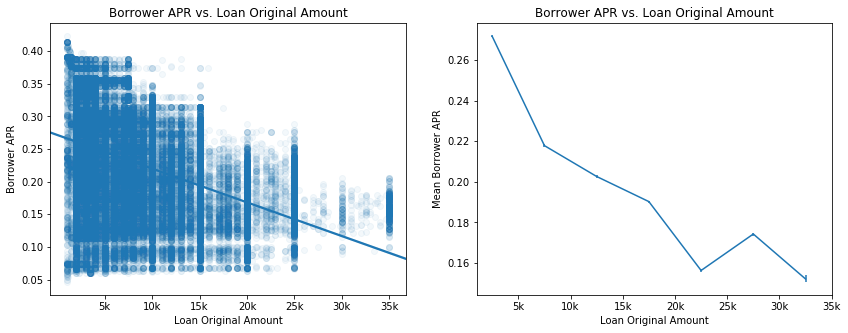

In [44]:
plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws = {'alpha' : 1/20});
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000], ['5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.xlabel('Loan Original Amount');
plt.ylabel('Borrower APR');
plt.title('Borrower APR vs. Loan Original Amount')
plt.subplot(1,2,2)
xbin_edges = np.arange(0, df['LoanOriginalAmount'].max()+5000, 5000)
xbin_centers = (xbin_edges + 2500)[:-1]
# compute statistics in each bin
data_xbins = pd.cut(df['LoanOriginalAmount'], xbin_edges, right = False, include_lowest = True)
y_means = df['BorrowerAPR'].groupby(data_xbins).mean()
y_sems = df['BorrowerAPR'].groupby(data_xbins).sem()
# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems);
plt.xlabel('Loan Original Amount');
plt.ylabel('Mean Borrower APR');
plt.title('Borrower APR vs. Loan Original Amount')
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000], ['5k', '10k', '15k', '20k', '25k', '30k', '35k']);


There is a negative interaction between Borrower APR and Loan Amount. For small amount of loans, borrowers get higher Borrower APRs. From the scatter plot, we can also infer that while the Borrower APR for the lower loans are more diversified, for the higher amount of loans it's range is getting narrower. One reason for that might be borrowers' Prosper Scores. Probably the high amount of loans are mostly given to the borrowers with high Prosper scores and I will analyze it later.

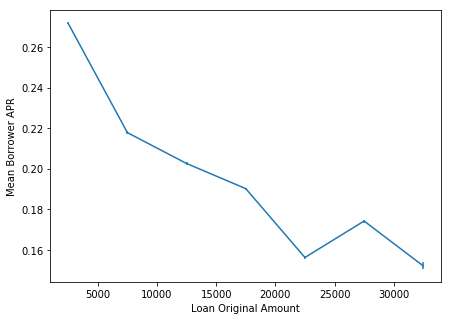

In [45]:
plt.figure(figsize = (7,5))

xbin_edges = np.arange(0, df['LoanOriginalAmount'].max()+5000, 5000)
xbin_centers = (xbin_edges + 2500)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['LoanOriginalAmount'], xbin_edges, right = False, include_lowest = True)
y_means = df['BorrowerAPR'].groupby(data_xbins).mean()
y_sems = df['BorrowerAPR'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems);
plt.xlabel('Loan Original Amount');
plt.ylabel('Mean Borrower APR');

Since the points are too intensive in the scatter plot, I also provide line plot which displays the relationship between average Borrower APR and Loan Amount. It can be seen that they are negativetly correlated but the line is not smooth. After decreasing to %15 in between 20k and 25k, Borrower APR begin to rise again until around 27k and right after that it drops even more.

#### Borrower APR & Stated Montly Income

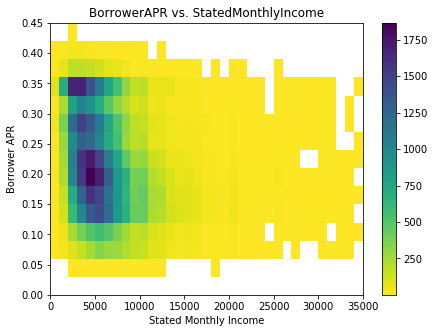

In [46]:
plt.figure(figsize = [7, 5]) 

bins_x = np.arange(0, df['StatedMonthlyIncome'].max()+1000, 1000)
bins_y = np.arange(0, df['BorrowerAPR'].max()+0.03, 0.03)
plt.hist2d(data = df, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', bins = [bins_x, bins_y],
           cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. StatedMonthlyIncome')
plt.ylabel('Borrower APR')
plt.xlabel('Stated Monthly Income');

As we can see from the heat plot, there is a negative relationship between Borrower APR and Stated monthly income. As income increses, Borrower APR decreases. There are probably multiple reasons for this relation, I guess one of them is  Prosper Score. The borrowers with higher incomes might have higher credit risk scores.

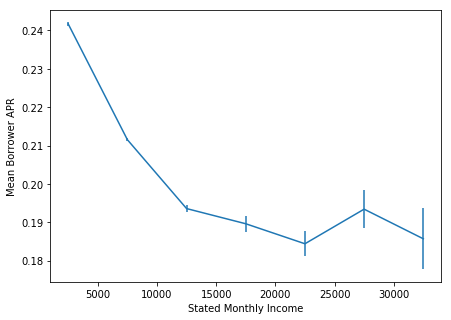

In [47]:
plt.figure(figsize = (7,5))

xbin_edges = np.arange(0, df['StatedMonthlyIncome'].max()+5000, 5000)
xbin_centers = (xbin_edges + 2500)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['StatedMonthlyIncome'], xbin_edges, right = False, include_lowest = True)
y_means = df['BorrowerAPR'].groupby(data_xbins).mean()
y_sems = df['BorrowerAPR'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems);
plt.xlabel('Stated Monthly Income');
plt.ylabel('Mean Borrower APR');

The behavior of this line is very similar to one in the previous line plot. However, the number of borrowers with income more than 20k is smaller and that is why the size of the error bars are bigger on the right side of the graph.

#### Borrower APR & Debt to Income Ratio 

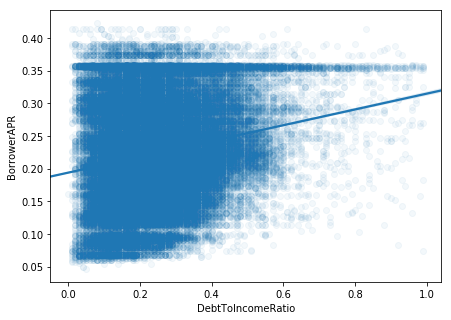

In [48]:
plt.figure(figsize = (7,5))
sb.regplot(data = df, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', scatter_kws = {'alpha' : 1/20});


Since there are a lot of points in the same area, I will get a sample from the all population and have a new scatter plot.

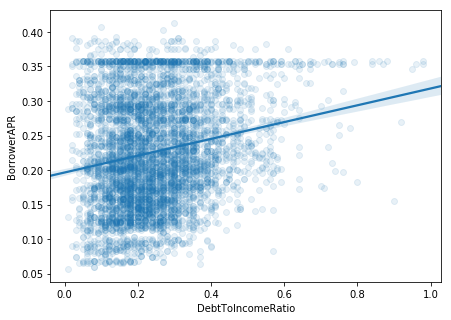

In [49]:
plt.figure(figsize = (7,5))
sb.regplot(data = df.sample(5000), x = 'DebtToIncomeRatio', y = 'BorrowerAPR', scatter_kws = {'alpha' : 1/10});


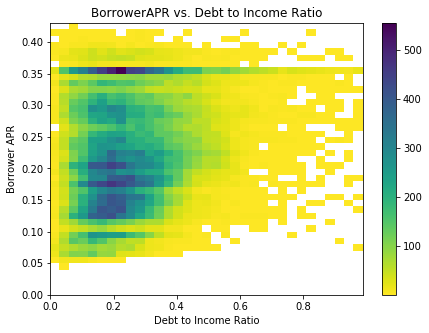

In [50]:
plt.figure(figsize = [7, 5]) 

bins_x = np.arange(0, df['DebtToIncomeRatio'].max()+0.03, 0.03)
bins_y = np.arange(0, df['BorrowerAPR'].max()+0.01, 0.01)
plt.hist2d(data = df, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', bins = [bins_x, bins_y],
           cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();
plt.title('BorrowerAPR vs. Debt to Income Ratio')
plt.ylabel('Borrower APR')
plt.xlabel('Debt to Income Ratio');

From both the scatter and the heat plots we can infer that Borrower APR and Debt to income ratio are positively correlated. When the proportion of debt to income increases the Borrower APR also increases. If we have a closer look to the plots, we can see that while Borrower APR varies more and the loan data is more dense for Debt to Income Ratio values between 0 and 0.3, it does not hold for the higher values.

#### Borrower APR & Delinquencies in Last 7 Years

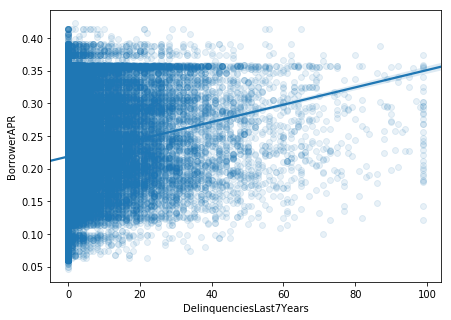

In [51]:
plt.figure(figsize = [7, 5]) 
sb.regplot(data = df, x = 'DelinquenciesLast7Years', y = 'BorrowerAPR', scatter_kws = {'alpha' : 1/10});


There is a weak positive correlation between Borrower APR and Delinquencies in Last 7 Years. More delinquent borrowers end up with higher Borrower APR.

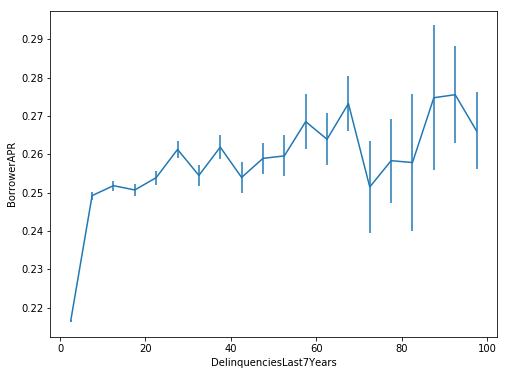

In [52]:
plt.figure(figsize = (8,6))


xbin_edges = np.arange(0, df['DelinquenciesLast7Years'].max()+5, 5)
xbin_centers = (xbin_edges + 2.5)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['DelinquenciesLast7Years'], xbin_edges, right = False, include_lowest = True)
y_means = df['BorrowerAPR'].groupby(data_xbins).mean()
y_sems = df['BorrowerAPR'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems);
plt.xlabel('DelinquenciesLast7Years');
plt.ylabel('BorrowerAPR');

The size of the error bars, i.e the uncertainty in the mean Borrower APR, increases with increasing delinquency values because there are fewer loans for higher delinquencies.

#### Borrower APR & Term

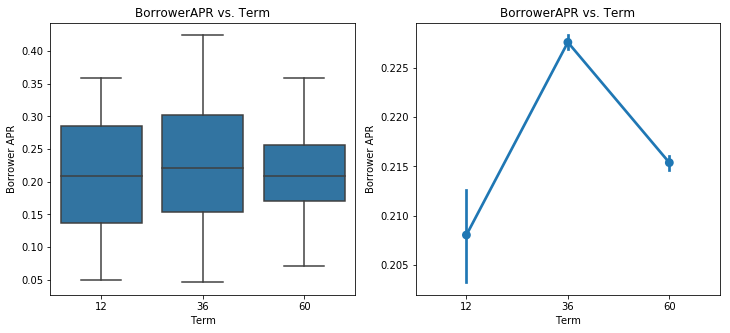

In [53]:
plt.figure(figsize = [12, 5]) 

plt.subplot(1, 2, 1)
sb.boxplot(data = df, x = 'Term', y = 'BorrowerAPR', color = base_color);
plt.title('BorrowerAPR vs. Term')
plt.ylabel('Borrower APR')
plt.xlabel('Term');

plt.subplot(1, 2, 2)
sb.pointplot(data = df, x = 'Term', y = 'BorrowerAPR');
plt.title('BorrowerAPR vs. Term')
plt.ylabel('Borrower APR')
plt.xlabel('Term');

The number of loans with 12-month length are smaller which means that people generally take loans for larger periods. 
The mean Borrower APR for 12-month loans is the smallest one. While the Borrower APR range is pretty much similar for 12-month and 36-month loans, it is narrower for 60-month loans. Conventionally, I would expect that 60-month loans having the highest mean Borrower APR but 36-month loans have the highest. There are probably some other causal factors and I belive Prosper Score is one of them. 


#### Borrower APR & Listing Category Numeric

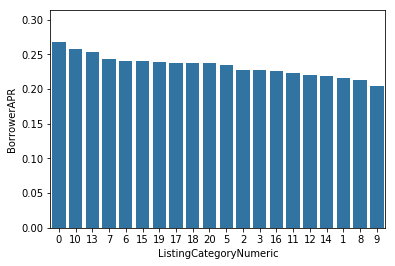

In [54]:
df_listing = df.groupby(["ListingCategoryNumeric"])['BorrowerAPR'].mean().reset_index().sort_values(by='BorrowerAPR',
                                                                                                    ascending=False) 

sb.barplot(data = df, x = 'ListingCategoryNumeric', y = 'BorrowerAPR',
           color = base_color, errwidth =0, order = df_listing['ListingCategoryNumeric']);


The borrowers who take loans for 0-unknown reasons, 10-Cosmetic Procedure and 13-Household Expenses pay most for the loan.

#### Borrower APR& Employment Status

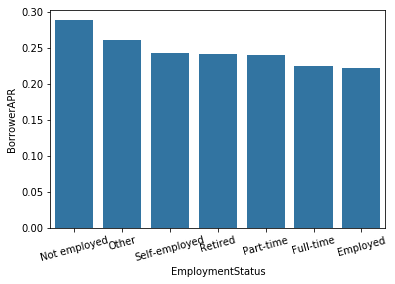

In [55]:
df_emp = df.groupby(["EmploymentStatus"])['BorrowerAPR'].mean().reset_index().sort_values(by='BorrowerAPR',ascending=False) 

sb.barplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR',
           color = base_color, errwidth =0, order = df_emp['EmploymentStatus'])
plt.xticks(rotation=15);

As expected, while unemployed people have the highest mean Borrower APR, employed borrowers has the lowest one.

#### BorrowerAPR & Occupation

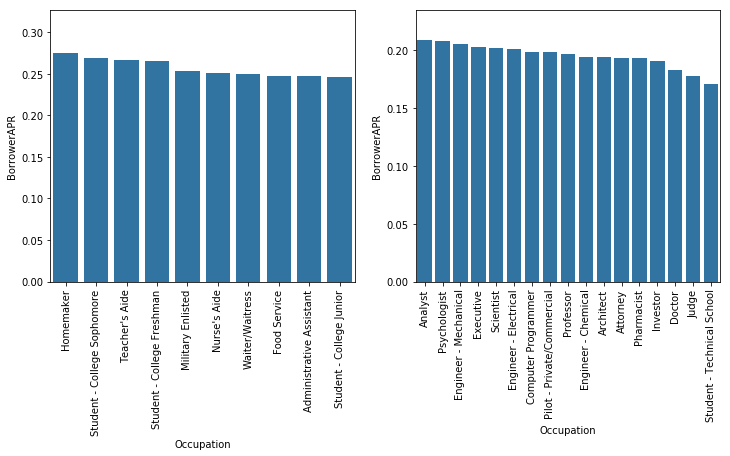

In [56]:
plt.figure(figsize = [12, 5]);

plt.subplot(1,2,1)
df_occ = df.groupby(["Occupation"])['BorrowerAPR'].mean().reset_index().sort_values(by='BorrowerAPR',ascending=False) 
sb.barplot(data = df, x = 'Occupation', y = 'BorrowerAPR',
           color = base_color, errwidth =0, order = df_occ['Occupation'][:10])
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sb.barplot(data = df, x = 'Occupation', y = 'BorrowerAPR',
           color = base_color, errwidth =0, order = df_occ['Occupation'][50:])
plt.xticks(rotation=90);

Homemakers, college sophomore students and teacher's aides have the highest and doctors, judges, techical school students have the lowest mean Borrower APR.

#### Borrower APR & Is Borrower Homeowner

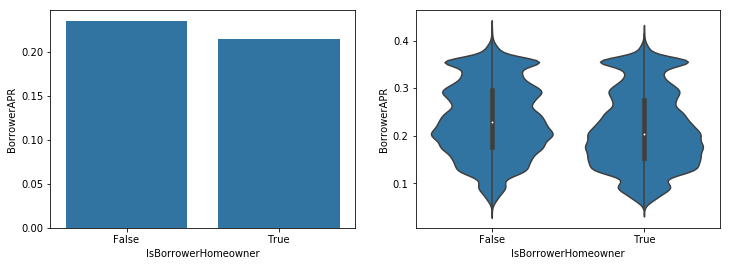

In [57]:
plt.figure(figsize = [12, 4]);

plt.subplot(1,2,1)
sb.barplot(data = df, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', color = base_color, errwidth = 0);

plt.subplot(1,2,2)
sb.violinplot(data = df, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', color = base_color);

Homeowners' mean Borrower APR is a bit smaller than the others and as it can be seen from the violin plot, the distributions on Borrower APR are very similar.

Now I will look at the interaction between Prosper Score and the other variables.

### Prosper Score

#### Prosper Score & Loan Original Amount

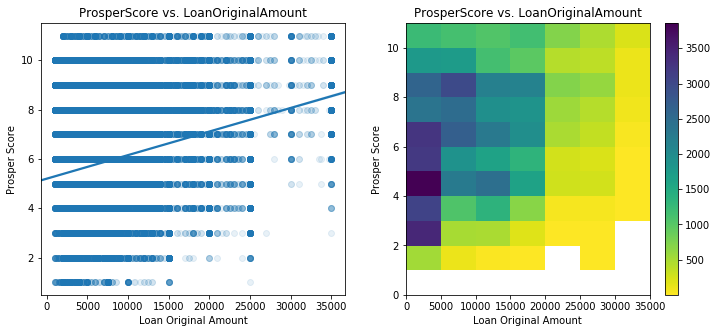

In [58]:
plt.figure(figsize = [12, 5]);

plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'ProsperScore', scatter_kws = {'alpha' : 1/10});
plt.title('ProsperScore vs. LoanOriginalAmount')
plt.ylabel('Prosper Score')
plt.xlabel('Loan Original Amount');

plt.subplot(1, 2, 2)
bins_x = np.arange(0, df['LoanOriginalAmount'].max()+5000, 5000)
bins_y = np.arange(0, df['ProsperScore'].max()+1, 1)
plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'ProsperScore', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();
plt.title('ProsperScore vs. LoanOriginalAmount')
plt.ylabel('Prosper Score')
plt.xlabel('Loan Original Amount');


As it can be seen from both plots, Loan Amount increases in Prosper Score so there is a positive correlation between two but it doesn't seem strong. Also, Prosper Score varies more for the small amount of loans.

#### Prosper Score & Stated Monthly Income

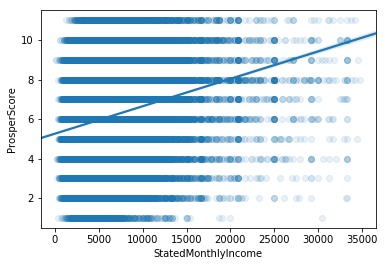

In [59]:
sb.regplot(data = df, x = 'StatedMonthlyIncome', y = 'ProsperScore', scatter_kws = {'alpha' : 1/10});

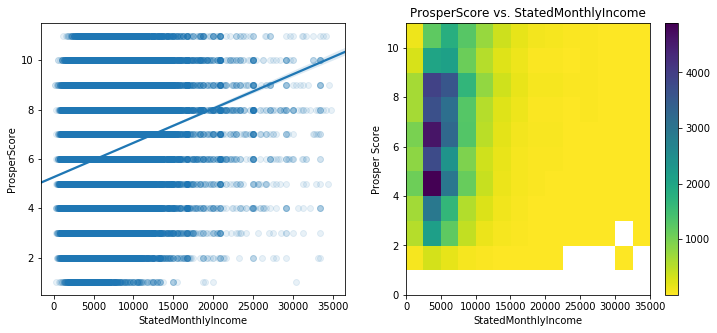

In [60]:
plt.figure(figsize = [12, 5]);

plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'StatedMonthlyIncome', y = 'ProsperScore', scatter_kws = {'alpha' : 1/10});

plt.subplot(1, 2, 2)
bins_x = np.arange(0, df['StatedMonthlyIncome'].max()+2500, 2500)
bins_y = np.arange(0, df['ProsperScore'].max()+1, 1)
plt.hist2d(data = df, x = 'StatedMonthlyIncome', y = 'ProsperScore', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();
plt.title('ProsperScore vs. StatedMonthlyIncome')
plt.ylabel('Prosper Score')
plt.xlabel('StatedMonthlyIncome');


Prosper Score and Stated Monthly Income are positively and weakly correlated. High income is probably one of the factors for borrowers to get a good Prosper Score.

#### Prosper Score & Debt To Income Ratio

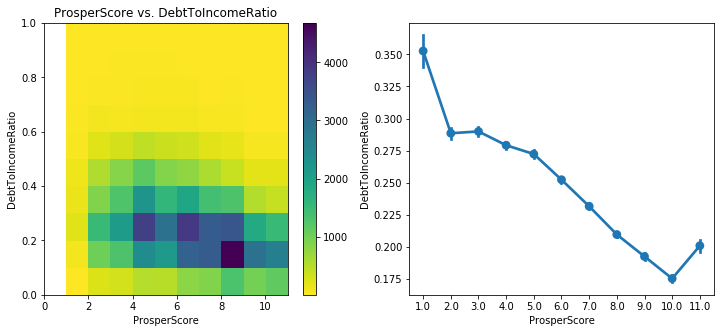

In [61]:
plt.figure(figsize = [12, 5]);
plt.subplot(1,2,1);
bins_y = np.arange(0, df['DebtToIncomeRatio'].max()+0.1, 0.1)
bins_x = np.arange(0, df['ProsperScore'].max()+1, 1)
plt.hist2d(data = df, x = 'ProsperScore', y = 'DebtToIncomeRatio', bins = [bins_x, bins_y], 
           cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();
plt.title('ProsperScore vs. DebtToIncomeRatio')
plt.xlabel('ProsperScore')
plt.ylabel('DebtToIncomeRatio');

plt.subplot(1,2,2);
sb.pointplot(data = df, x = 'ProsperScore', y = 'DebtToIncomeRatio');


There is a negative interaction between Prosper Score and Debt to Income ratio.

#### Prospect Score & Delinquencies in Last 7 Years

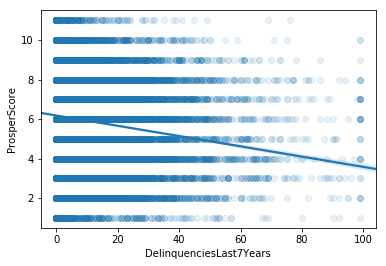

In [62]:
sb.regplot(data = df, x = 'DelinquenciesLast7Years', y = 'ProsperScore', scatter_kws = {'alpha' : 1/10});


As delinquencies increases the Prosper Score falls. We expect lower scores for delinquent borrowers for sure, but it is not the only determinant for Prosper Score that is why this correlation is weak.

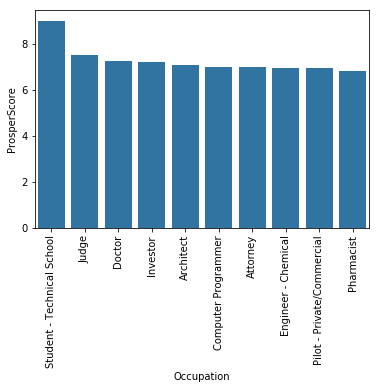

In [63]:
df_occ = df.groupby(["Occupation"])['ProsperScore'].mean().reset_index().sort_values(by='ProsperScore',ascending=False) 
sb.barplot(data = df, x = 'Occupation', y = 'ProsperScore',
           color = base_color, errwidth =0, order = df_occ['Occupation'][:10])
plt.xticks(rotation=90);


Techical school students, judges and doctors have the highest mean Prosper Scores which is in line with the Borrower APR & Occupation analysis.

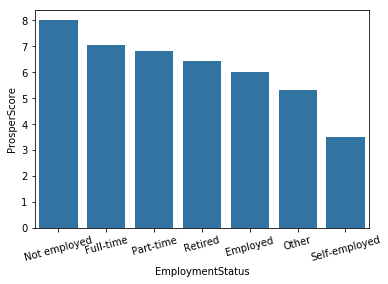

In [64]:
df_emp = df.groupby(["EmploymentStatus"])['ProsperScore'].mean().reset_index().sort_values(by='ProsperScore',
                                                                                           ascending=False) 

sb.barplot(data = df, x = 'EmploymentStatus', y = 'ProsperScore',
           color = base_color, errwidth =0, order = df_emp['EmploymentStatus'])
plt.xticks(rotation=15);

Surprisingly, the unemployed people has the highest Prosper Score. Let's have a look at the box plot.

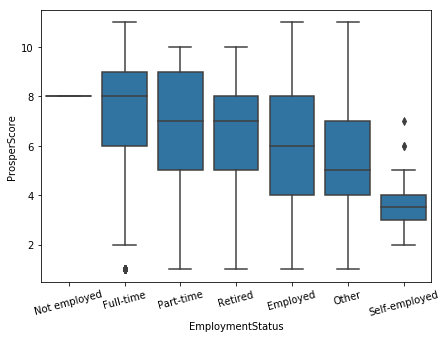

In [65]:
plt.figure(figsize = [7, 5])

sb.boxplot(data = df, x = 'EmploymentStatus', y = 'ProsperScore', color = base_color, order = df_emp['EmploymentStatus']);
plt.xticks(rotation=15);

The number of unemployed people is really small so it is not representative and we can say that the full-time employed people has the highest mean Prosper Score.

#### Prosper Score & Is Borrower Homeowner

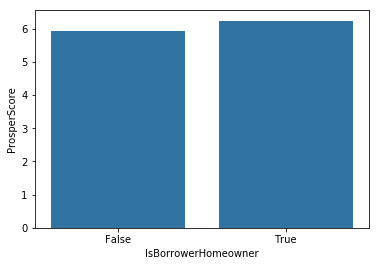

In [66]:
sb.barplot(data = df, x = 'IsBorrowerHomeowner', y = 'ProsperScore', color = base_color, errwidth = 0);

It seems like home ownership does not affect Prosper Score substantially.

Finally, I will investigate the correlation between Loan Original Amount and the other variables.

### LoanOriginalAmount

#### Loan Original Amount & Term

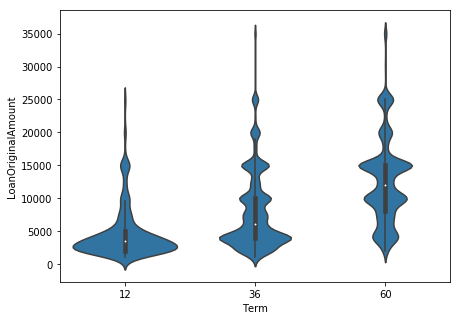

In [67]:
plt.figure(figsize = [7, 5])

sb.violinplot(data = df, x = 'Term', y = 'LoanOriginalAmount', color = base_color);

We can see that the mean loan amount increases with number of months. For 12-month loans, the higher proportion of the distribution consists of the loan amounts smaller than 5k, which is plausible. It is similar for 36-month loans but the distribution is more spread because people who take loan more than 5k would probably need more time to pay their debt. 60-month loan distribution is even more spread and the reason is the same.

#### Loan Original Amount  & Stated Monthly Income

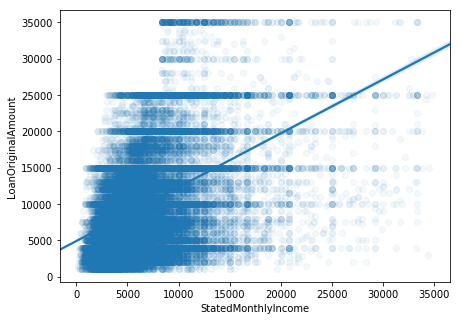

In [68]:
plt.figure(figsize = (7,5))
sb.regplot(data = df, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', scatter_kws = {'alpha' : 1/20});

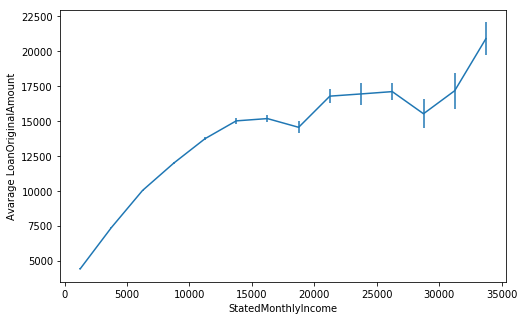

In [69]:
plt.figure(figsize = (8,5))

xbin_edges = np.arange(0, df['StatedMonthlyIncome'].max()+2500, 2500)
xbin_centers = (xbin_edges + 1250)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['StatedMonthlyIncome'], xbin_edges, right = False, include_lowest = True)
y_means = df['LoanOriginalAmount'].groupby(data_xbins).mean()
y_sems = df['LoanOriginalAmount'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems);
plt.ylabel('Avarage LoanOriginalAmount');
plt.xlabel('StatedMonthlyIncome');


There is a moderate positive correlation between Loan Amount and Stated monthly income, which is expected because having a high income is a good motivation to take out a large amount of loan.

#### Loan Original Amount  & Listing Category

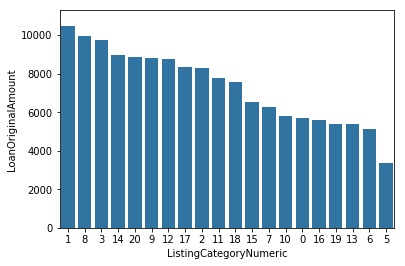

In [70]:
df_listing = df.groupby(["ListingCategoryNumeric"])['LoanOriginalAmount'].mean().reset_index().sort_values(
    by='LoanOriginalAmount',ascending=False) 

sb.barplot(data = df, x = 'ListingCategoryNumeric', y = 'LoanOriginalAmount',
           color = base_color, errwidth =0, order = df_listing['ListingCategoryNumeric']);


Borrowers take large amount of loans for 1 - Debt Consolidation, 8 - Baby&Adoption, and 3 - Business in average.

#### Loan Original Amount & Borrower State

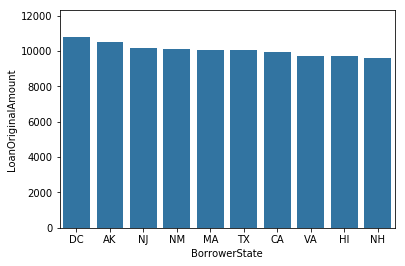

In [71]:
df_state = df.groupby(["BorrowerState"])['LoanOriginalAmount'].mean().reset_index().sort_values(by='LoanOriginalAmount',ascending=False) 

sb.barplot(data = df, x = 'BorrowerState', y = 'LoanOriginalAmount',
           color = base_color, errwidth =0, order = df_state['BorrowerState'][:10]);


#### Loan Original Amount & Occupation

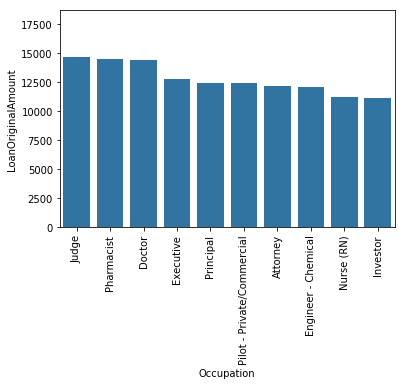

In [72]:
df_occ = df.groupby(["Occupation"])['LoanOriginalAmount'].mean().reset_index().sort_values(by='LoanOriginalAmount',ascending=False) 

sb.barplot(data = df, x = 'Occupation', y = 'LoanOriginalAmount',
           color = base_color, errwidth =0, order = df_occ['Occupation'][:10])
plt.xticks(rotation=90);


Judges, Pharmacists and Doctors take the highest average loan amounts.

#### Loan Original Amount & Employment Status

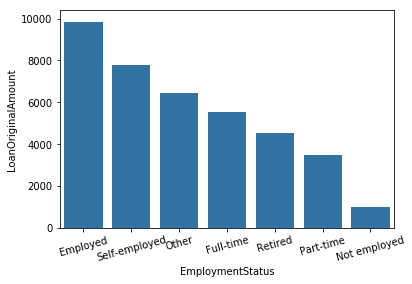

In [73]:
df_emp = df.groupby(["EmploymentStatus"])['LoanOriginalAmount'].mean().reset_index().sort_values(by='LoanOriginalAmount',ascending=False) 

sb.barplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount',
           color = base_color, errwidth =0, order = df_emp['EmploymentStatus']);
plt.xticks(rotation=15);



As expected, employed people take the large amount of loans.

#### Loan Original Amount & Is Borrower Homeowner

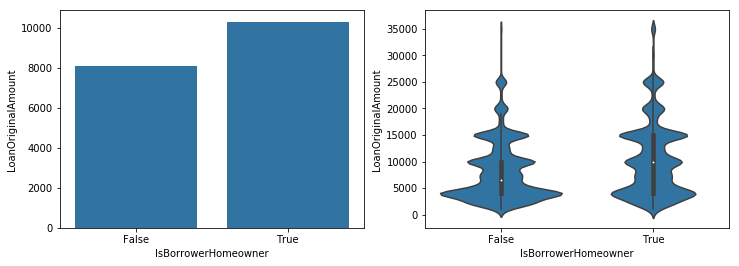

In [74]:
plt.figure(figsize = [12, 4]);
plt.subplot(1,2,1)
sb.barplot(data = df, x = 'IsBorrowerHomeowner', y = 'LoanOriginalAmount', color = base_color, errwidth = 0);

plt.subplot(1,2,2)
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'IsBorrowerHomeowner', y = 'LoanOriginalAmount', color = base_color);


It seems like home ownership matters when taking out large amount of loans.

#### Prosper Score & Employment Status

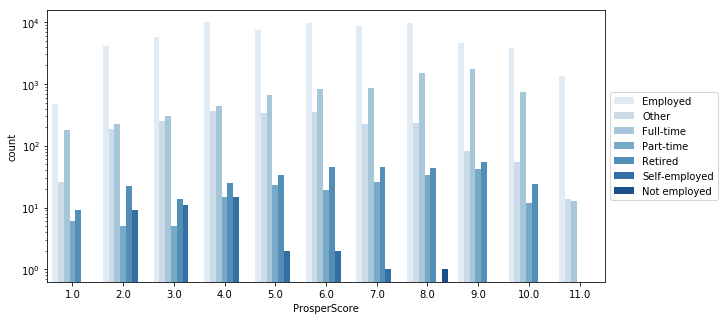

In [75]:
plt.figure(figsize = [10, 5]);
sb.countplot(data = df, x = 'ProsperScore', hue = 'EmploymentStatus', palette='Blues');
plt.legend(loc = 6, bbox_to_anchor=(1.0, 0.5))
plt.yscale('log');

I used log transformation to see the bars more clear. For each Prosper Score, while number of employed borrowers is highest, the number of unemployed people is lowest.

#### Prosper Score & Term

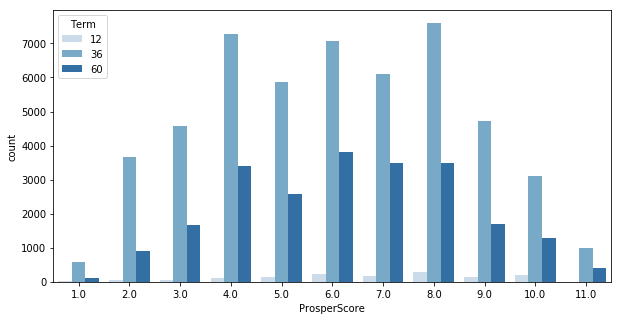

In [76]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df, x = 'ProsperScore', hue = 'Term', palette='Blues');

As we see earlier, the proportion of 36-month terms is largest and the proportion  of 12-month terms is lowest. This does not change for different Prosper Score levels.

#### Loan Status & Term

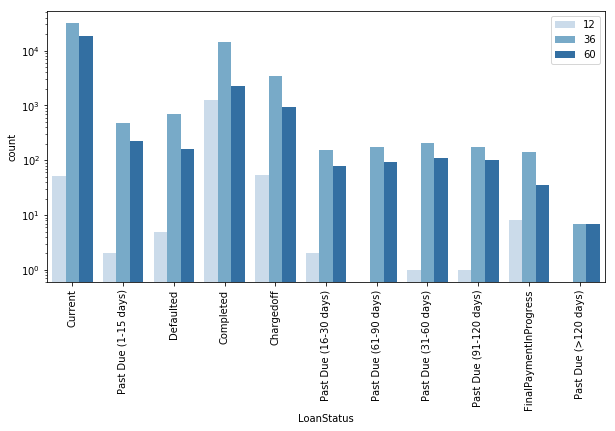

In [77]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term', palette='Blues');
plt.yscale('log')
plt.legend(loc = 1);
plt.xticks(rotation=90);

Again, I used log transformation and it follows a similar pattern.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There is almost a strong negative relationship between Borrower APR and Prosper Score. 
- There is a negative interaction between Borrower APR and Loan Amount.
- Borrower APR and Stated monthly income are negatively correlated.
- Borrower APR and Debt to Income Ratio are positively and weakly correlated.
- There is a weak positive correlation between Borrower APR and Delinquencies in Last 7 Years.
- 36-month loans have the highest average Borrower APR while 12-month loans have the lowest.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Loan Amount increases in Prosper Score, they are weakly correlated.
- Prosper Score and Stated Monthly Income are positively and weakly correlated. 
- There is a negative interaction between Prosper Score and Debt to Income ratio.
- As delinquencies in last 7 years increases the Prosper Score falls but they are weakly correlated.
- There is a moderate positive correlation between Loan Amount and Stated monthly income.
- Homeowners take larger amount of loans.


## Multivariate Exploration

I will explore in this part of the analysis that how the categorical variables affect the relationship between the numerical variables.

#### Role of Term on the relationship between Borrower APR and Prosper Score

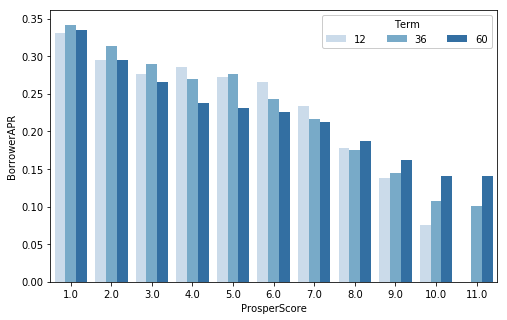

In [78]:
plt.figure(figsize = [8, 5])

ax = sb.barplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'Term',  palette='Blues', errwidth =0);
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Term')

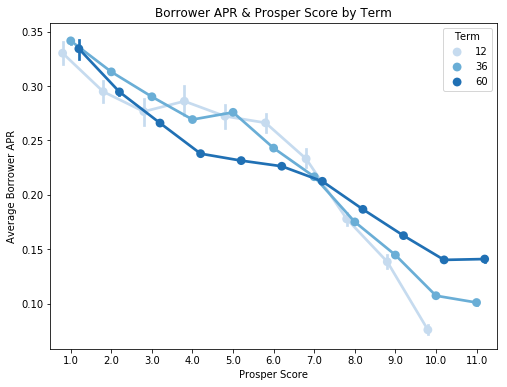

In [79]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.title('Borrower APR & Prosper Score by Term')
plt.ylabel('Average Borrower APR')
plt.xlabel('Prosper Score');
plt.show();

The people with score greater than 7 pay more for the 60-month loans while it is the opposite for the scores from 3 to 7.

#### Role of home ownership on the relationship between Borrower APR and Prosper Score

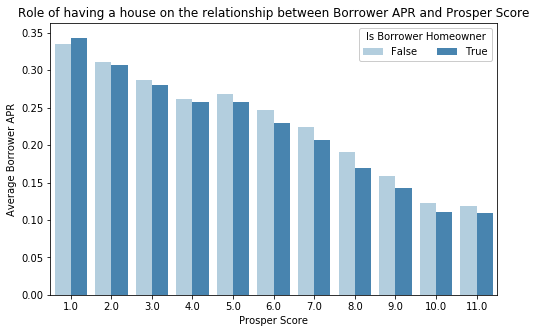

In [80]:
plt.figure(figsize = [8, 5])

ax = sb.barplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner',
                palette='Blues', errwidth =0);
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Is Borrower Homeowner');
plt.title('Role of having a house on the relationship between Borrower APR and Prosper Score')
plt.ylabel('Average Borrower APR')
plt.xlabel('Prosper Score');


Homeowners get lower mean Borrower APR's comparing to the non homeowners for each Prosper Score except 1 but the difference is pretty low.

#### Role of Term on the relationship between Borrower APR & Loan Original Amount 

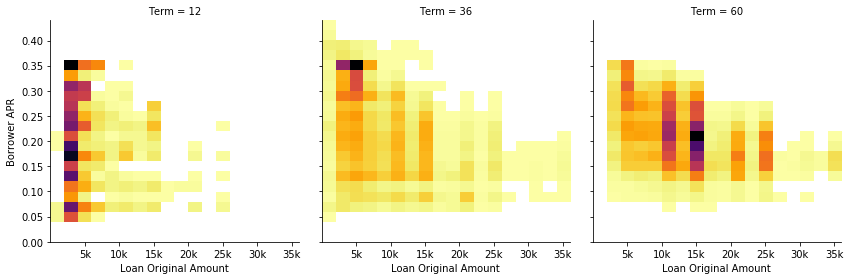

In [81]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_y = np.arange(0, df.BorrowerAPR.max()+.02, .02)
    bins_x = np.arange(0, df.LoanOriginalAmount.max()+2000, 2000)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    
# create faceted heat maps on levels of the term variable
g = sb.FacetGrid(data = df, col = 'Term', size = 4)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Loan Original Amount')
g.set_ylabels('Borrower APR')
# plt.title('Relationship of BorrowerAPR and Loan Original Amount for Different Terms')
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000], ['5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.show()

For each term level data shows positive trend and this trend is more clear for 60-month loans. One thing to be noted is that the loans are mostly squeezed into a smaller range of Loan Amount for 12-month, this range becomes larger when the term increases.

#### Role of Term on the relationship between Prosper Score and Loan Original Amount

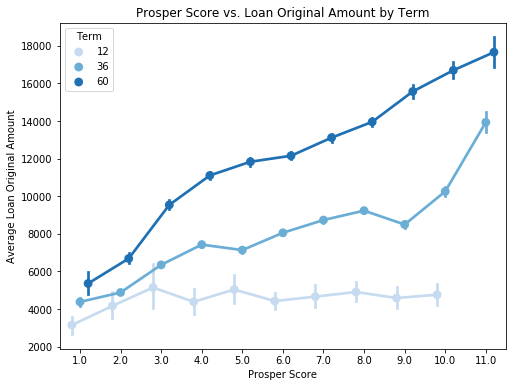

In [82]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.title('Prosper Score vs. Loan Original Amount by Term')
plt.ylabel('Average Loan Original Amount')
plt.xlabel('Prosper Score');

plt.show();

The data shows positive trend for each term level. The line is getting steeper as the term increases. For the fixed Prosper Score, the borrowers take higher amount of loans in average when the term increases.

#### Role of home ownership on the relationship between Loan Original Amount  and Prosper Score

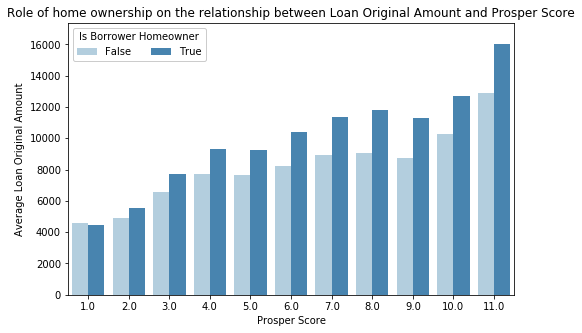

In [83]:
plt.figure(figsize = [8, 5])

ax = sb.barplot(data = df, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
                palette='Blues', errwidth =0);
ax.legend(loc = 2, ncol = 3, framealpha = 1, title = 'Is Borrower Homeowner');
plt.title('Role of home ownership on the relationship between Loan Original Amount and Prosper Score')
plt.ylabel('Average Loan Original Amount')
plt.xlabel('Prosper Score');


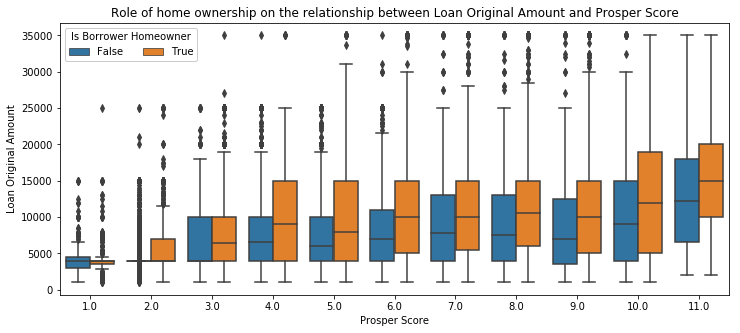

In [84]:
plt.figure(figsize = [12, 5])

ax = sb.boxplot(data = df, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner');
ax.legend(loc = 2, ncol = 3, framealpha = 1, title = 'Is Borrower Homeowner');
plt.title('Role of home ownership on the relationship between Loan Original Amount and Prosper Score')
plt.ylabel('Loan Original Amount')
plt.xlabel('Prosper Score');


In the same Prosper score level, it seems like the homeowners take out larger amount of loans comparing to the non homeowners.

#### Role of Borrower Type on the relationship between Borrower APR and Prosper Score

Create a new variable *BorrowerType* by categorizing people according to their delinquency numbers.

In [85]:
def delinq (row):
    if row <= 5:
        return 'Very Good'
    elif row <= 10:
        return 'Good'
    elif row <= 30:
        return 'Not Good'
    elif row <= 60:
        return 'Bad'
    else:
        return 'Very Bad'

df['BorrowerType'] = df.apply(lambda row: delinq(row.DelinquenciesLast7Years),axis=1)

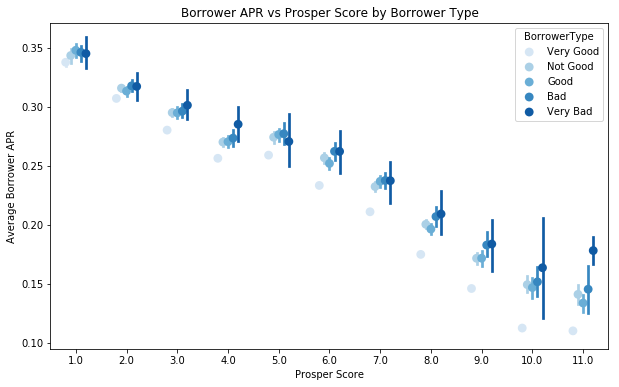

In [86]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'BorrowerType',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower APR vs Prosper Score by Borrower Type')
plt.ylabel('Average Borrower APR')
plt.xlabel('Prosper Score');
plt.show();

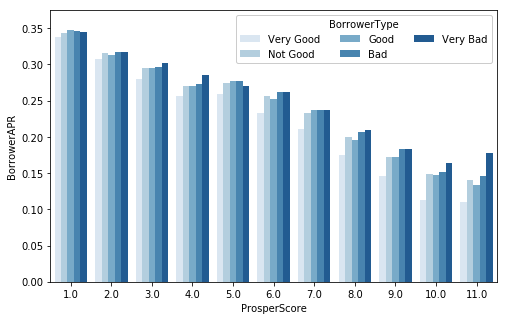

In [87]:
plt.figure(figsize = [8, 5])

ax = sb.barplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'BorrowerType',
                palette='Blues', errwidth =0);
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'BorrowerType');

It can be seen that in general, borrowers whose type is 'Very Bad' always pay most and 'Very Good' pay least for the loan irrespective of their Prosper Score. On the other hand, the relationship varies for the other categories.

#### Role of Term on the relationship between Borrower APR & Debt To Income Ratio

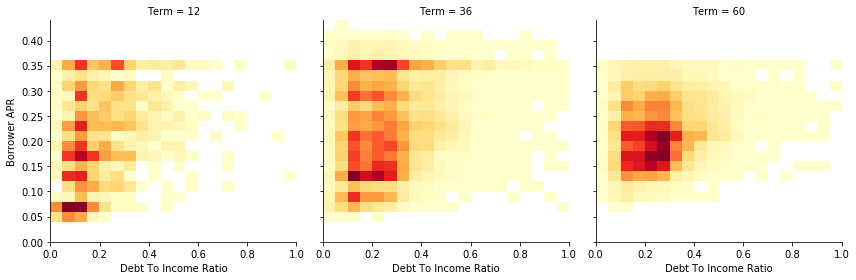

In [88]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_y = np.arange(0, df.BorrowerAPR.max()+.02, .02)
    bins_x = np.arange(0, df.DebtToIncomeRatio.max()+0.05, 0.05)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

g = sb.FacetGrid(data = df, col = 'Term', size = 4)
g.map(hist2dgrid, 'DebtToIncomeRatio', 'BorrowerAPR', color = 'YlOrRd')
g.set_xlabels('Debt To Income Ratio')
g.set_ylabels('Borrower APR')
plt.show()

For the Debt to income ratios between 0-0.3, while the Borrower APR changes from 0.05 to 0.035 for 12-month and 36-month loans, its range is gets narrower for 60-month loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In my multivariate exploration, I found that
- Term does not have a fixed effect on the relationship between Borrower APR and Prosper Score. However, it has a consistent behavior if we do our analysis by dividing scores into intervals. While the borrowers with score greater than 7 pay more for the 60-month loans while it is the opposite for the scores from 3 to 7.
- Homeowners pay more for the loans comparing to the non homeowners for each Prosper Score except 1 but this difference is pretty low.
- For each term level there is a positive relationship between Loan Amount and Borrower APR. One thing to be noted is that the loans are mostly squeezed into a smaller range of Loan Amount for 12-month, this range becomes larger when the term increases.
- For the fixed Prosper Score, the borrowers take higher amount of loans in average when the term increases.
- For the fixed Prosper Score, it seems like home ownership matters, the homeowners are able to take out larger amount of loans comparing to the non homeowners.
- In general,'Very Bad' type borrowers have the highest average Borrower APR while the 'Very Good' types have the lowest one for the fixed Prosper Score. 
- For the Debt to income ratios between 0-0.3, while the Borrower APR changes from 0.05 to 0.035 for 12-month and 36-month loans, its range is gets narrower for 60-month loans.


### Were there any interesting or surprising interactions between features?

The effect of term on the relationship between Borrower APR and Prosper Score is not very clear. There are probably other variables which affect this interaction.